# Instructions for authors

- Everyone please write **1 sentence per line** in Markdown, it makes editing much easier, and Markdown interprets as break only two returns in a row, so it doesn't change the rendering.
- Don't spend time on styling the content, just focus on the content itself at the moment and only use Markdown when possible.

# INTRODUCTION TO **SENTIMENT ANALYSIS** WITH **LUDWIG** 

**Author List:** Piero Molino and Elias Castro Hernandez

**About (TL/DR):** The following notebook introduces developers and data scientists to sentiment analysis using Ludwig. Ludwig provides users with a varied set of language technology tools that serve users with a fully integrated NLP toolkit that is fast, robust, and modern. The notebook is designed to show the ease with which a baseline model can be iterated upon and refined into a state-of-the-art, production ready, model -- all with but a few lines of code.  


**Learning Goal(s):** Learn how to perform sentiment analysis using Ludwig.

**Target:** Data scientists, applied machine learning engineers, and developers

**Prerequisite Knowledge:** (1) Ludwig, (2) Sentiment Analysis, and (3) Machine Learning

**Copyright:** add later.

## CONTENTS

- ### PREREQUISITE KNOWLEDGE
- ### STANFORD SENTIMENT TREEBANK (SST)
- ### BASELINEs, MODEL COMPARISON AND RESULTS
- ### DEPLOY MODEL USING REST API
- ### WRAP UP AND NEXT STEPS
- ### APPENDIX: INSTALLATION

## PREREQUISITE **KNOWLEDGE**

This tutorial assumes you have a basic understanding of Python and Machine Learning.
Having basic notions of Deep Learning and Natural Language Processing will make following easier.
Below we collected some introductory material for those not familiar with those topics.

### **PYTHON**

<details>
<summary>Expand</summary>
Ludwig is built using [Python](https://www.python.org/) and relies on common Python packages (e.g. [NumPy](https://numpy.org/)) for operation. If you have a lot of programming experience in a different language (e.g. C/C++/Matlab/Java/Javascript), you will likely be fine, otherwise:

- [**Python (EDX free)**](https://www.edx.org/course?search_query=python)<br>
- [**Python (Coursera free)**](https://www.coursera.org/search?query=python)
</details>


### **MACHINE LEARNING**

<details>
<summary>Expand</summary>
Sentiment analysis requires the taking cost functions, the understanding of derivatives and performing optimization with gradient descent. If you already have basic machine learning and/or deep learning knowledge, this notebook will make more sense. However this knowledge is not a barrier for doing sentiment analysis with Ludwig. There are several resources on the web that cover machine learning should you want to learn more.  Following are a few approachable ones:

- [**A Course in Machine Learning (ebook)**](http://ciml.info/)
- [**An Intro to Statistical to Statistical Learning (book)**](http://faculty.marshall.usc.edu/gareth-james/ISL/)
- [**An Intro to Statistical to Statistical Learning (python code)**](https://github.com/tdpetrou/Machine-Learning-Books-With-Python/tree/master/Introduction%20to%20Statistical%20Learning)
</details>


### **DEEP LEARNING**

<details>
<summary>Expand</summary>
Deep learning models are the state-of-the-art approach for doing sentiment analysis. Deep learning has several subsets and models that are worth knowing. However, knowledge is not required in order to deploy them using Ludwig. In case you want to learn more, see the following accessible resource:

- [**Deep Learning (MIT Book)**](http://www.deeplearningbook.org/)
- **Dive into Deep Learning** [ebook](https://d2l.ai/d2l-en.pdf) | [book website](http://d2l.ai/)  
</details>


### **NATURAL LANGUAGE PROCESSING (NLP)**

<details>
<summary>Expand</summary>
Natural Language Processing (NLP) deals with the study of human language from a computational perspective. The field is both deep and broad, but only minimal knowledge is required in order to deploy NLP models in Ludwig. There are a lot of great resources on the web that cover NLP. Following are some approachable resources:

- [**NLP Online Courses**](https://blog.coursesity.com/best-natural-language-processing-courses/)
- [**NLP Class Website (Stanford)**](https://web.stanford.edu/class/cs224n/)
- [**NLP Class Website (UC Berkeley)**](https://cal-cs288.github.io/sp20/)
</details>


### **NLP WITH DEEP LEARNING**

<details>
<summary>Expand</summary>
Deep learning models are used for state-of-the-art formulations. The area is rich in subtopics, techniques, and methodologies. For an overview see the following:

- [**Deep Learning for Sentiment Analysis (Research Overview)**](https://arxiv.org/pdf/1801.07883.pdf)
</details>


### **SENTIMENT ANALYSIS**

<details>
<summary>Expand</summary>

[**Sentiment analysis**](https://en.wikipedia.org/wiki/Sentiment_analysis) is a subfield of [**Natural Language Understanding (NLU)**](https://en.wikipedia.org/wiki/Natural-language_understanding), that applies [**machine learning**](https://en.wikipedia.org/wiki/Machine_learning) and [**deep learning**](https://en.wikipedia.org/wiki/Deep_learning) frameworks in order to categorize text as holding a particular sentiment -- that is, it assigns a positive or negative orientation to the text.
There are many theoretical topics that underlie sentiment analysis and for the sake of focusing on the implementation, are assumed to be understood.
</details>

## **DATASET**: STANFORD SENTIMENT TREEBANK (SST)

![Example Parse Tree for a Simple Sentence](/tutorials/00_sentiment_analysis/images/nlParse.png)

The [**Stanford Sentiment Treebank (SST)**](https://nlp.stanford.edu/sentiment/) is a sentence-level corpus of 10,662 labeled sentences. SST was created via a crowd-sourced effort to both (1) manually label the original [Rotten Tomatoes dataset (Pang & Lee 2005)](http://www.cs.cornell.edu/people/pabo/movie-review-data/) sentences, and (2) label every single phrase in each of the branches of the [parsing-trees](https://medium.com/basecs/grammatically-rooting-oneself-with-parse-trees-ec9daeda7dad) for all of the sentences. This novel approach [(Socher et al. 2013)](https://www.researchgate.net/publication/284039049_Recursive_deep_models_for_semantic_compositionality_over_a_sentiment_treebank) matters since [semantic word spaces](https://en.wikipedia.org/wiki/Semantic_space), although extremely useful, cannot express the meaning of longer phrases and in particular may result in differing classifications based on the parsing [grammar](http://www.cs.cornell.edu/courses/cs2110/2014fa/L21-ParsingTrees/cs2110fa14Parsing.pdf). 

- For a quick overview see this [Computerphile](https://www.youtube.com/watch?v=bxpc9Pp5pZM) video.<br>
- For an accessible deep dive, see [Tomassetti's Guide to Parsing](https://tomassetti.me/guide-parsing-algorithms-terminology/).

## **BASELINE**, MODEL COMPARISON, AND **RESULTS**


## **INSTALL** LUDWIG AND TORCHTEXT

**About Ludwig:** Ludwig is an open source deep learning framework buit atop of TensorFlow that allows users to rapidly train and iterate on state of the art deep learning models with only a few lines of code.

**About Torchtext:** Torchtext makes common natural language preprocessing easier and convenient -- particularly because of built-in functionality that loads, pads and batches data into whatever your prefered deep learning framework requires.

### **General Information**

- [**INSTALL LUDWIG**](https://uber.github.io/ludwig/getting_started/)
- [**INSTALL TORCHTEXT**](https://pytorch.org/text/index.html)

### **Install LUDWIG**


**To Install Ludwig:**

```bash
# recommended approach
pip install ludwig 
```

OR

```bash
# install it by building the source code from the repository:
git clone git@github.com:uber/ludwig.git
cd ludwig
virtualenv -p python3 venv
source venv/bin/activate
pip install -r requirements.txt
python setup.py install
```

**Note:** Ludwig is developed and tested with Python 3 in mind. To install Python 3:

```bash
sudo apt install python3  # on ubuntu
brew install python3      # on mac
```

###### **Install necessary PACKAGES**

```bash
pip install torchtext
```

In [ ]:
# installing ludwig
!pip install ludwig

     |████████████████████████████████| 174kB 3.4MB/s 
     |████████████████████████████████| 110.5MB 36kB/s 
     |████████████████████████████████| 512kB 44.5MB/s 
     |████████████████████████████████| 3.8MB 59.2MB/s 
  Created wheel for ludwig: filename=ludwig-0.2.2.8-cp36-none-any.whl size=237087 sha256=62a06a6db03f6228e768402f67bbe8f047a11bb8fe19adcef9577026d1bc3c19
  Stored in directory: /root/.cache/pip/wheels/d1/2b/e0/b82d2b135328bd7518a81c54f4b1ac3de9d90c902b08d15278
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=2c26d16e62bb5d53853b011a5f55823ddbdde10afd4ee31a91fe54cbdea79fb9
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built ludwig gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Success

In [ ]:
# uninstall tensorflow-1.15.3 as installed from ludwig
!pip uninstall tensorflow -y

# install tensorflow-gpu version to switch over GPU 
!pip install tensorflow-gpu==1.15.2

Uninstalling tensorflow-1.15.3:
  Successfully uninstalled tensorflow-1.15.3


In [ ]:
# check if GPU available 
import tensorflow as tf

device_name = tf.test.gpu_device_name()
print('tf.test.is_gpu_available():', tf.test.is_gpu_available())
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tf.test.is_gpu_available(): True
Found GPU at: /device:GPU:0


###### **LOAD PACKAGES**

In [ ]:
import ludwig                                               # main library
from ludwig.api import LudwigModel                          # machine learning 
import torch
import torch.utils.data as data                             # tokenizing and ngrams
from torchtext import data as torchtext_data                # data preprocessing utilities
from torchtext import datasets                              # get data --> https://pytorch.org/text/datasets.html
from nltk.tokenize.treebank import TreebankWordDetokenizer  # parse throught data structure
import pandas as pd
import pandas.util.testing as tm
import yaml                                                 # issuing Ludwig commands
import logging                                              # error and operation logs
from pprint import pprint                                   # human readable print
from tqdm import trange                                     # make loops display a progress meter

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if __name__ == '__main__':


### **LOAD DATA**

To perform sentiment analysis on the SST dataset, we will be using [**Torchtext**](https://pytorch.org/text/) to gather and split the datag.
If you choose to build from the ground up, you fill find the SST data in **stanfordSentimentTreebank** or **stanfordSentimentTreebankRaw** in the data folder.
The following provides and gentle introduction to DIY [**data preprocessing**](https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79), while [**mlexplained**](https://mlexplained.com/2018/02/08/a-comprehensive-tutorial-to-torchtext/) has a great intro to Torchtext.

In [ ]:
# define classifications for sentiment labels
idx2class = ["positive", "negative", "very positive", "very negative", "neutral"]
class2idx = {c: i for i, c in enumerate(idx2class)}

# intialize Vocab tensor objects
text_field = torchtext_data.Field()
label_field = torchtext_data.Field(sequential=False)  # no tokenization since False
# get data and split into testing and training --> https://pytorch.org/text/datasets.html#sst
train_data, val_data, test_data = datasets.SST.splits(
    text_field,
    label_field,
    fine_grained=True,
    train_subtrees=True,  #use all subtrees in the training set
)
# text in SST is already tokenized, but we want to detokenize it
# to obtain a single string, so we have to use a detokenizer
detokenizer = TreebankWordDetokenizer()

# Let's collect texts and labels in the training set
x_train = []
y_train = []
for i in trange(len(train_data), ascii=True):
    # fills x_train with text and y_train with indexes from 0 to 4 mapping to the labels in the idz2class list
    x_train.append(detokenizer.detokenize(vars(train_data[i])["text"]))  
    y_train.append(class2idx[vars(train_data[i])["label"]])

# Let's collect texts and labels in the validation set
x_vali = []
y_vali = []
for i in trange(len(val_data), ascii=True):
    x_vali.append(detokenizer.detokenize(vars(val_data[i])["text"]))  
    y_vali.append(class2idx[vars(val_data[i])["label"]])

# Let's collect texts and labels in the test set
x_test = []
y_test = []
for i in trange(len(test_data), ascii=True):
    x_test.append(detokenizer.detokenize(vars(test_data[i])["text"]))  
    y_test.append(class2idx[vars(test_data[i])["label"]])


# Reformat data into pandas dataframes
train_data = pd.DataFrame({"text": x_train, "label": y_train})
validation_data = pd.DataFrame({"text": x_vali, "label": y_vali})
test_data = pd.DataFrame({"text": x_test, "label": y_test})
train_data


downloading trainDevTestTrees_PTB.zip


trainDevTestTrees_PTB.zip: 100%|██████████| 790k/790k [00:00<00:00, 1.54MB/s]


extracting


100%|##########| 2210/2210 [00:00<00:00, 9997.33it/s]


,text,label
0,The Rock is destined to be the 21st Century's ...,0
1,The Rock,4
2,The,4
3,Rock,4
4,is destined to be the 21st Century's new``Cona...,2
...,...,...
318577,case zero.,1
318578,case,4
318579,zero.,1
318580,zero,1


In [ ]:
pd.set_option('display.max_colwidth', -1)  
train_data.head()
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,text,label
0,Effective but too-tepid biopic,4
1,"If you sometimes like to go to the movies to have fun, Wasabi is a good place to start.",0
2,"Emerges as something rare, an issue movie that's so honest and keenly observed that it doesn't feel like one.",2
3,The film provides some great insight into the neurotic mindset of all comics--even those who have reached the absolute top of the game.,4
4,Offers that rare combination of entertainment and education.,2
...,...,...
2205,An imaginative comedy\/thriller.,0
2206,"-LRB- A -RRB- rare, beautiful film.",2
2207,-LRB- An -RRB- hilarious romantic comedy.,2
2208,Never -LRB- sinks -RRB- into exploitation.,0


In [ ]:
# vanilla rnn model
model_definition = {
    'input_features': [
        {'name': 'text', 'type': 'text', 'level': 'word', 'encoder': 'rnn'},
    ],
    'output_features': [
        {'name': 'label', 'type': 'category'}
    ],
    'training': {
        'early_stop': 100
    }
}
model_definition
print("creating model...")
model = LudwigModel(model_definition, logging_level = logging.DEBUG)

print("training model...")
model.train(data_train_df=train_data, data_validation_df=validation_data, data_test_df=test_data)

creating model...
training model...
Experiment name: api_experiment
Model name: run
Output path: results/api_experiment_run_0


ludwig_version: '0.2.2.8'
command: ('/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py -f '
 '/root/.local/share/jupyter/runtime/kernel-ccc0b160-c4f9-4333-b16f-9bf28abd14c2.json')
random_seed: 42
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'encoder': 'rnn',
                              'level': 'word',
                              'name': 'text',
                              'tied_weights': None,
                              'type': 'text'}],
    'output_features': [   {   'dependencies': [],
                               'loss': {   'class_similarities_temperature': 0,
                                           'class_weights': 1,
                                           'confidence_penalty': 0,
                                           'distortion': 1,
                                           'labe

In [ ]:
# parallel cnn model with a 0.00001 learning rate
model_definition = {
    'input_features': [
        {'name': 'text', 'type': 'text', 'level': 'word', 'encoder': 'parallel_cnn'},
    ],
    'output_features': [
        {'name': 'label', 'type': 'category'}
    ],
    'training': {
        'learning_rate': 0.00001, 
        'early_stop': 10,
    }
}
model_definition

{'input_features': [{'encoder': 'parallel_cnn',
   'level': 'word',
   'name': 'text',
   'type': 'text'}],
 'output_features': [{'name': 'label', 'type': 'category'}],
 'training': {'early_stop': 10, 'learning_rate': 1e-05}}

In [ ]:
print("creating model...")
model = LudwigModel(model_definition, logging_level = logging.DEBUG)

print("training model...")
model.train(data_train_df=train_data, data_validation_df=validation_data, data_test_df=test_data)


creating model...
training model...
Experiment name: api_experiment
Model name: run
Output path: results/api_experiment_run


ludwig_version: '0.2.2.8'
command: ('/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py -f '
 '/root/.local/share/jupyter/runtime/kernel-83ee49fe-f989-4772-8c8b-75cedff371e8.json')
random_seed: 42
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'encoder': 'parallel_cnn',
                              'level': 'word',
                              'name': 'text',
                              'tied_weights': None,
                              'type': 'text'}],
    'output_features': [   {   'dependencies': [],
                               'loss': {   'class_similarities_temperature': 0,
                                           'class_weights': 1,
                                           'confidence_penalty': 0,
                                           'distortion': 1,
                                         

{'test': OrderedDict([('label',
               OrderedDict([('loss',
                             [2.5810806723201978,
                              2.4383255453670727,
                              2.4071818873893083,
                              2.441694074950067,
                              2.5130913195027484,
                              2.5836942129005673,
                              2.655858277195719,
                              2.7420154312617098,
                              2.777057292126962,
                              2.8254023314601158,
                              2.87514309084793,
                              2.966772668070383,
                              3.090374127556296,
                              3.2112711565526904,
                              3.3470981235417847,
                              3.511439382975997]),
                            ('accuracy',
                             [0.17601809954751133,
                              0.1760180995475

In [ ]:
model_definition = {
    'input_features': [
        {'name': 'text', 'type': 'text', 'level': 'word', 'encoder': 'cnnrnn'},
    ],
    'output_features': [
        {'name': 'label', 'type': 'category'}
    ],
    'training': {
        'learning_rate': 0.00001, 
        'early_stop': 10,
    }
}

print("creating model...")
model = LudwigModel(model_definition, logging_level = logging.DEBUG)

print("training model...")
model.train(data_train_df=train_data, data_validation_df=validation_data, data_test_df=test_data)

creating model...
training model...
Experiment name: api_experiment


INFO:ludwig.train:Experiment name: api_experiment


Model name: run


INFO:ludwig.train:Model name: run


Output path: results/api_experiment_run_0


INFO:ludwig.train:Output path: results/api_experiment_run_0


INFO:ludwig.train:



ludwig_version: '0.2.2.8'


INFO:ludwig.train:ludwig_version: '0.2.2.8'


command: ('/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py -f '
 '/root/.local/share/jupyter/runtime/kernel-a3716bf6-a0de-4274-a27a-5acb85301f56.json')


INFO:ludwig.train:command: ('/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py -f '
 '/root/.local/share/jupyter/runtime/kernel-a3716bf6-a0de-4274-a27a-5acb85301f56.json')


random_seed: 42


INFO:ludwig.train:random_seed: 42


model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'encoder': 'cnnrnn',
                              'level': 'word',
                              'name': 'text',
                              'tied_weights': None,
                              'type': 'text'}],
    'output_features': [   {   'dependencies': [],
                               'loss': {   'class_similarities_temperature': 0,
                                           'class_weights': 1,
                                           'confidence_penalty': 0,
                                           'distortion': 1,
                                           'labels_smoothing': 0,
                                           'negative_samples': 0,
                                           'robust_lambda': 0,
                                           'sampler': None,
                                           'type': 'softmax_cross_entropy',
                                           'uniqu

INFO:ludwig.train:model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'encoder': 'cnnrnn',
                              'level': 'word',
                              'name': 'text',
                              'tied_weights': None,
                              'type': 'text'}],
    'output_features': [   {   'dependencies': [],
                               'loss': {   'class_similarities_temperature': 0,
                                           'class_weights': 1,
                                           'confidence_penalty': 0,
                                           'distortion': 1,
                                           'labels_smoothing': 0,
                                           'negative_samples': 0,
                                           'robust_lambda': 0,
                                           'sampler': None,
                                           'type': 'softmax_cross_entropy',
                               

INFO:ludwig.train:



Using training dataframe


INFO:ludwig.data.preprocessing:Using training dataframe


Building dataset (it may take a while)


INFO:ludwig.data.preprocessing:Building dataset (it may take a while)


Training set: 318582


INFO:ludwig.train:Training set: 318582


Validation set: 1101


INFO:ludwig.train:Validation set: 1101


Test set: 2210


INFO:ludwig.train:Test set: 2210


DEBUG:ludwig.train:


╒════════════════╕


DEBUG:ludwig.train:╒════════════════╕


│ BUILDING MODEL │


DEBUG:ludwig.train:│ BUILDING MODEL │


╘════════════════╛


DEBUG:ludwig.train:╘════════════════╛


DEBUG:ludwig.train:


- Input text feature text


DEBUG:ludwig.models.inputs:- Input text feature text


  targets_placeholder: Tensor("text/text_placeholder:0", shape=(?, ?), dtype=int32)


DEBUG:ludwig.features.text_feature:  targets_placeholder: Tensor("text/text_placeholder:0", shape=(?, ?), dtype=int32)


  embeddings: <tf.Variable 'text/embeddings:0' shape=(17857, 256) dtype=float32_ref>


DEBUG:ludwig.models.modules.embedding_modules:  embeddings: <tf.Variable 'text/embeddings:0' shape=(17857, 256) dtype=float32_ref>


  embedded: Tensor("text/embeddings_lookup/Identity:0", shape=(?, ?, 256), dtype=float32)


DEBUG:ludwig.models.modules.embedding_modules:  embedded: Tensor("text/embeddings_lookup/Identity:0", shape=(?, ?, 256), dtype=float32)


  hidden: Tensor("text/Mul:0", shape=(?, ?, 256), dtype=float32)


DEBUG:ludwig.models.modules.sequence_encoders:  hidden: Tensor("text/Mul:0", shape=(?, ?, 256), dtype=float32)


  conv_weights: <tf.Variable 'text/conv_0/weights:0' shape=(5, 256, 256) dtype=float32_ref>


DEBUG:ludwig.models.modules.convolutional_modules:  conv_weights: <tf.Variable 'text/conv_0/weights:0' shape=(5, 256, 256) dtype=float32_ref>


  conv_biases: <tf.Variable 'text/conv_0/biases:0' shape=(256,) dtype=float32_ref>


DEBUG:ludwig.models.modules.convolutional_modules:  conv_biases: <tf.Variable 'text/conv_0/biases:0' shape=(256,) dtype=float32_ref>


  conv_0: Tensor("text/conv_0/Relu:0", shape=(?, ?, 256), dtype=float32)


DEBUG:ludwig.models.modules.convolutional_modules:  conv_0: Tensor("text/conv_0/Relu:0", shape=(?, ?, 256), dtype=float32)


Instructions for updating:
Use keras.layers.MaxPooling1D instead.


Instructions for updating:
Use keras.layers.MaxPooling1D instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


  pool_0: Tensor("text/conv_0/pool_5/Squeeze:0", shape=(?, ?, 256), dtype=float32)


DEBUG:ludwig.models.modules.convolutional_modules:  pool_0: Tensor("text/conv_0/pool_5/Squeeze:0", shape=(?, ?, 256), dtype=float32)


  hidden: Tensor("text/conv_0/pool_5/Squeeze:0", shape=(?, ?, 256), dtype=float32)


DEBUG:ludwig.models.modules.convolutional_modules:  hidden: Tensor("text/conv_0/pool_5/Squeeze:0", shape=(?, ?, 256), dtype=float32)


  conv_weights: <tf.Variable 'text/conv_1/weights:0' shape=(5, 256, 256) dtype=float32_ref>


DEBUG:ludwig.models.modules.convolutional_modules:  conv_weights: <tf.Variable 'text/conv_1/weights:0' shape=(5, 256, 256) dtype=float32_ref>


  conv_biases: <tf.Variable 'text/conv_1/biases:0' shape=(256,) dtype=float32_ref>


DEBUG:ludwig.models.modules.convolutional_modules:  conv_biases: <tf.Variable 'text/conv_1/biases:0' shape=(256,) dtype=float32_ref>


  conv_1: Tensor("text/conv_1/Relu:0", shape=(?, ?, 256), dtype=float32)


DEBUG:ludwig.models.modules.convolutional_modules:  conv_1: Tensor("text/conv_1/Relu:0", shape=(?, ?, 256), dtype=float32)


  hidden: Tensor("text/conv_1/Relu:0", shape=(?, ?, 256), dtype=float32)


DEBUG:ludwig.models.modules.convolutional_modules:  hidden: Tensor("text/conv_1/Relu:0", shape=(?, ?, 256), dtype=float32)


  hidden: Tensor("text/conv_1/Relu:0", shape=(?, ?, 256), dtype=float32)


DEBUG:ludwig.models.modules.sequence_encoders:  hidden: Tensor("text/conv_1/Relu:0", shape=(?, ?, 256), dtype=float32)


Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


Instructions for updating:
Please use `layer.add_weight` method instead.


Instructions for updating:
Please use `layer.add_weight` method instead.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


  text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/kernel:0: <tf.Variable 'text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/kernel:0' shape=(512, 256) dtype=float32_ref>


DEBUG:ludwig.models.modules.recurrent_modules:  text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/kernel:0: <tf.Variable 'text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/kernel:0' shape=(512, 256) dtype=float32_ref>


  text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/bias:0: <tf.Variable 'text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>


DEBUG:ludwig.models.modules.recurrent_modules:  text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/bias:0: <tf.Variable 'text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>


  rnn_outputs: Tensor("text/rnn_stack/rnn/transpose_1:0", shape=(?, ?, 256), dtype=float32)


DEBUG:ludwig.models.modules.recurrent_modules:  rnn_outputs: Tensor("text/rnn_stack/rnn/transpose_1:0", shape=(?, ?, 256), dtype=float32)


  reduced_rnn_output: Tensor("text/rnn_stack/GatherNd:0", shape=(?, 256), dtype=float32)


DEBUG:ludwig.models.modules.recurrent_modules:  reduced_rnn_output: Tensor("text/rnn_stack/GatherNd:0", shape=(?, 256), dtype=float32)


  feature_representation: Tensor("text/rnn_stack/GatherNd:0", shape=(?, 256), dtype=float32)


DEBUG:ludwig.features.sequence_feature:  feature_representation: Tensor("text/rnn_stack/GatherNd:0", shape=(?, 256), dtype=float32)


- Combiner concat


DEBUG:ludwig.models.model:- Combiner concat


  concat_hidden: Tensor("concat_combiner/concat/concat:0", shape=(?, 256), dtype=float32)


DEBUG:ludwig.models.combiners:  concat_hidden: Tensor("concat_combiner/concat/concat:0", shape=(?, 256), dtype=float32)


- Output category feature label


DEBUG:ludwig.models.outputs:- Output category feature label


  targets_placeholder: Tensor("label/label_placeholder:0", shape=(?,), dtype=int64)


DEBUG:ludwig.features.category_feature:  targets_placeholder: Tensor("label/label_placeholder:0", shape=(?,), dtype=int64)


  class_weights: <tf.Variable 'label/predictions_label/weights:0' shape=(256, 6) dtype=float32_ref>


DEBUG:ludwig.features.category_feature:  class_weights: <tf.Variable 'label/predictions_label/weights:0' shape=(256, 6) dtype=float32_ref>


  class_biases: <tf.Variable 'label/predictions_label/biases:0' shape=(6,) dtype=float32_ref>


DEBUG:ludwig.features.category_feature:  class_biases: <tf.Variable 'label/predictions_label/biases:0' shape=(6,) dtype=float32_ref>


  logits: Tensor("label/predictions_label/add:0", shape=(?, 6), dtype=float32)


DEBUG:ludwig.features.category_feature:  logits: Tensor("label/predictions_label/add:0", shape=(?, 6), dtype=float32)


- Regularization losses: [<tf.Tensor 'text/embeddings/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'text/conv_0/weights/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'text/conv_1/weights/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/kernel/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/bias/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'label/predictions_label/weights/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>]


DEBUG:ludwig.models.outputs:- Regularization losses: [<tf.Tensor 'text/embeddings/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'text/conv_0/weights/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'text/conv_1/weights/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/kernel/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'text/rnn_stack/rnn/multi_rnn_cell/cell_0/basic_rnn_cell/bias/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>, <tf.Tensor 'label/predictions_label/weights/Regularizer/l2_regularizer:0' shape=<unknown> dtype=float32>]


INFO:ludwig.utils.print_utils:


╒══════════╕


INFO:ludwig.utils.print_utils:╒══════════╕


│ TRAINING │


INFO:ludwig.utils.print_utils:│ TRAINING │


╘══════════╛


INFO:ludwig.utils.print_utils:╘══════════╛


INFO:ludwig.utils.print_utils:



Epoch   1


INFO:ludwig.models.model:
Epoch   1


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 20.90it/s]
Took 5m 52.7561s


INFO:ludwig.models.model:Took 5m 52.7561s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9899 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1314 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2285 │     0.1760 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9899 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1314 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2285 │     0.1760 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


Validation loss on combined improved, model saved


INFO:ludwig.models.model:Validation loss on combined improved, model saved


INFO:ludwig.models.model:



Epoch   2


INFO:ludwig.models.model:
Epoch   2


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.26it/s]
Took 5m 49.4659s


INFO:ludwig.models.model:Took 5m 49.4659s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9888 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1278 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2247 │     0.1760 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9888 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1278 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2247 │     0.1760 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


Validation loss on combined improved, model saved


INFO:ludwig.models.model:Validation loss on combined improved, model saved


INFO:ludwig.models.model:



Epoch   3


INFO:ludwig.models.model:
Epoch   3


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.89it/s]
Took 5m 48.5168s


INFO:ludwig.models.model:Took 5m 48.5168s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9887 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1282 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2251 │     0.1760 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9887 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1282 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2251 │     0.1760 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 1 epoch ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 1 epoch ago


INFO:ludwig.models.model:



Epoch   4


INFO:ludwig.models.model:
Epoch   4


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 21.70it/s]
Took 5m 47.2758s


INFO:ludwig.models.model:Took 5m 47.2758s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9886 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1274 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2244 │     0.1760 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9886 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1274 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2244 │     0.1760 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


Validation loss on combined improved, model saved


INFO:ludwig.models.model:Validation loss on combined improved, model saved


INFO:ludwig.models.model:



Epoch   5


INFO:ludwig.models.model:
Epoch   5


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.09it/s]
Took 5m 51.5407s


INFO:ludwig.models.model:Took 5m 51.5407s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9888 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1265 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2234 │     0.1765 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.9888 │     0.6899 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 2.1265 │     0.2080 │      0.7239 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 2.2234 │     0.1765 │      0.6932 │
╘══════════╧════════╧════════════╧═════════════╛


Validation loss on combined improved, model saved


INFO:ludwig.models.model:Validation loss on combined improved, model saved


INFO:ludwig.models.model:



Epoch   6


INFO:ludwig.models.model:
Epoch   6


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.36it/s]
Took 5m 51.1069s


INFO:ludwig.models.model:Took 5m 51.1069s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.8142 │     0.6917 │      0.9364 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6256 │     0.2489 │      0.7212 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6623 │     0.2371 │      0.6910 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.8142 │     0.6917 │      0.9364 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6256 │     0.2489 │      0.7212 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6623 │     0.2371 │      0.6910 │
╘══════════╧════════╧════════════╧═════════════╛


Validation loss on combined improved, model saved


INFO:ludwig.models.model:Validation loss on combined improved, model saved


INFO:ludwig.models.model:



Epoch   7


INFO:ludwig.models.model:
Epoch   7


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.69it/s]
Took 5m 52.3095s


INFO:ludwig.models.model:Took 5m 52.3095s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.7585 │     0.6962 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.5970 │     0.2616 │      0.7193 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6090 │     0.2412 │      0.6968 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.7585 │     0.6962 │      0.9365 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.5970 │     0.2616 │      0.7193 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6090 │     0.2412 │      0.6968 │
╘══════════╧════════╧════════════╧═════════════╛


Validation loss on combined improved, model saved


INFO:ludwig.models.model:Validation loss on combined improved, model saved


INFO:ludwig.models.model:



Epoch   8


INFO:ludwig.models.model:
Epoch   8


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.34it/s]
Took 5m 50.6003s


INFO:ludwig.models.model:Took 5m 50.6003s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.7209 │     0.7094 │      0.9421 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6073 │     0.2579 │      0.7130 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6192 │     0.2380 │      0.7063 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.7209 │     0.7094 │      0.9421 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6073 │     0.2579 │      0.7130 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6192 │     0.2380 │      0.7063 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 1 epoch ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 1 epoch ago


INFO:ludwig.models.model:



Epoch   9


INFO:ludwig.models.model:
Epoch   9


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.42it/s]
Took 5m 53.9700s


INFO:ludwig.models.model:Took 5m 53.9700s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6919 │     0.7214 │      0.9469 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6171 │     0.2607 │      0.7230 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6304 │     0.2407 │      0.7145 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6919 │     0.7214 │      0.9469 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6171 │     0.2607 │      0.7230 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6304 │     0.2407 │      0.7145 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 2 epochs ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 2 epochs ago


INFO:ludwig.models.model:



Epoch  10


INFO:ludwig.models.model:
Epoch  10


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.10it/s]
Took 5m 52.2974s


INFO:ludwig.models.model:Took 5m 52.2974s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6695 │     0.7315 │      0.9497 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6241 │     0.2579 │      0.7266 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6386 │     0.2434 │      0.7154 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6695 │     0.7315 │      0.9497 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6241 │     0.2579 │      0.7266 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6386 │     0.2434 │      0.7154 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 3 epochs ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 3 epochs ago


INFO:ludwig.models.model:



Epoch  11


INFO:ludwig.models.model:
Epoch  11


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.37it/s]
Took 5m 49.2065s


INFO:ludwig.models.model:Took 5m 49.2065s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6518 │     0.7381 │      0.9521 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6336 │     0.2543 │      0.7266 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6521 │     0.2457 │      0.7181 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6518 │     0.7381 │      0.9521 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6336 │     0.2543 │      0.7266 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6521 │     0.2457 │      0.7181 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 4 epochs ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 4 epochs ago


INFO:ludwig.models.model:



Epoch  12


INFO:ludwig.models.model:
Epoch  12


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.71it/s]
Took 5m 52.5527s


INFO:ludwig.models.model:Took 5m 52.5527s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6366 │     0.7438 │      0.9540 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6462 │     0.2579 │      0.7339 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6694 │     0.2457 │      0.7163 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6366 │     0.7438 │      0.9540 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6462 │     0.2579 │      0.7339 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6694 │     0.2457 │      0.7163 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 5 epochs ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 5 epochs ago


INFO:ludwig.models.model:



Epoch  13


INFO:ludwig.models.model:
Epoch  13


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 23.18it/s]
Took 5m 54.7007s


INFO:ludwig.models.model:Took 5m 54.7007s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6227 │     0.7494 │      0.9558 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6617 │     0.2561 │      0.7384 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6900 │     0.2471 │      0.7217 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6227 │     0.7494 │      0.9558 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6617 │     0.2561 │      0.7384 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.6900 │     0.2471 │      0.7217 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 6 epochs ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 6 epochs ago


INFO:ludwig.models.model:



Epoch  14


INFO:ludwig.models.model:
Epoch  14


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.74it/s]
Took 5m 53.8873s


INFO:ludwig.models.model:Took 5m 53.8873s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6098 │     0.7541 │      0.9575 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6799 │     0.2598 │      0.7357 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.7134 │     0.2425 │      0.7213 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.6098 │     0.7541 │      0.9575 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.6799 │     0.2598 │      0.7357 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.7134 │     0.2425 │      0.7213 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 7 epochs ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 7 epochs ago


INFO:ludwig.models.model:



Epoch  15


INFO:ludwig.models.model:
Epoch  15


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 21.88it/s]
Took 5m 53.3787s


INFO:ludwig.models.model:Took 5m 53.3787s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.5984 │     0.7582 │      0.9590 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.7033 │     0.2634 │      0.7348 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.7435 │     0.2416 │      0.7226 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.5984 │     0.7582 │      0.9590 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.7033 │     0.2634 │      0.7348 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.7435 │     0.2416 │      0.7226 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 8 epochs ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 8 epochs ago


INFO:ludwig.models.model:



Epoch  16


INFO:ludwig.models.model:
Epoch  16


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 22.30it/s]
Took 5m 51.3016s


INFO:ludwig.models.model:Took 5m 51.3016s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.5876 │     0.7644 │      0.9603 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.7287 │     0.2634 │      0.7339 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.7746 │     0.2434 │      0.7204 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.5876 │     0.7644 │      0.9603 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.7287 │     0.2634 │      0.7339 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.7746 │     0.2434 │      0.7204 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 9 epochs ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 9 epochs ago


INFO:ludwig.models.model:



Epoch  17


INFO:ludwig.models.model:
Epoch  17


Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 21.64it/s]
Took 5m 50.5664s


INFO:ludwig.models.model:Took 5m 50.5664s


╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.5761 │     0.7689 │      0.9616 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.7525 │     0.2670 │      0.7312 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.8009 │     0.2552 │      0.7149 │
╘══════════╧════════╧════════════╧═════════════╛


INFO:ludwig.models.model:╒══════════╤════════╤════════════╤═════════════╕
│ label    │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.5761 │     0.7689 │      0.9616 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 1.7525 │     0.2670 │      0.7312 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 1.8009 │     0.2552 │      0.7149 │
╘══════════╧════════╧════════════╧═════════════╛


Last improvement of loss on combined happened 10 epochs ago


INFO:ludwig.models.model:Last improvement of loss on combined happened 10 epochs ago



EARLY STOPPING due to lack of validation improvement, it has been 10 epochs since last validation accuracy improvement



INFO:ludwig.models.model:
EARLY STOPPING due to lack of validation improvement, it has been 10 epochs since last validation accuracy improvement



Best validation model epoch: 7


INFO:ludwig.train:Best validation model epoch: 7


Best validation model loss on validation set combined: 1.5970008981758415


INFO:ludwig.train:Best validation model loss on validation set combined: 1.5970008981758415


Best validation model loss on test set combined: 1.6089882483849158


INFO:ludwig.train:Best validation model loss on test set combined: 1.6089882483849158



Finished: api_experiment_run


INFO:ludwig.train:
Finished: api_experiment_run


Saved to: results/api_experiment_run_0


INFO:ludwig.train:Saved to: results/api_experiment_run_0


{'test': OrderedDict([('label',
               OrderedDict([('loss',
                             [2.2285152107342334,
                              2.2247150887191567,
                              2.225090002689966,
                              2.224412605665388,
                              2.223370409659131,
                              1.662285130703611,
                              1.6089882483849158,
                              1.6191998201258042,
                              1.6303661622612724,
                              1.6385504537038673,
                              1.6520824484156267,
                              1.6694107297319092,
                              1.6899570137127493,
                              1.7133756887858809,
                              1.7435333390041714,
                              1.7746492584366604,
                              1.8008995919206023]),
                            ('accuracy',
                             [0.1760180995

In [ ]:
# stacked parallel cnn model with a 0.001 learning rate
model_definition = {
    'input_features': [
        {'name': 'text', 'type': 'text', 'level': 'word', 'encoder': 'stacked_parallel_cnn'},
    ],
    'output_features': [
        {'name': 'label', 'type': 'category'}
    ],
    'training': {
        'learning_rate': 0.001, 
        'early_stop': 10,
    }
}

print("creating model...")
model = LudwigModel(model_definition, logging_level = logging.DEBUG)

print("training model...")
model.train(data_train_df=train_data, data_validation_df=validation_data, data_test_df=test_data)

creating model...
training model...
Experiment name: api_experiment
Model name: run
Output path: results/api_experiment_run


ludwig_version: '0.2.2.8'
command: ('/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py -f '
 '/root/.local/share/jupyter/runtime/kernel-a3716bf6-a0de-4274-a27a-5acb85301f56.json')
random_seed: 42
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'encoder': 'stacked_parallel_cnn',
                              'level': 'word',
                              'name': 'text',
                              'tied_weights': None,
                              'type': 'text'}],
    'output_features': [   {   'dependencies': [],
                               'loss': {   'class_similarities_temperature': 0,
                                           'class_weights': 1,
                                           'confidence_penalty': 0,
                                           'distortion': 1,
                                 

{'test': OrderedDict([('label',
               OrderedDict([('loss',
                             [1.34062737339762,
                              1.2795256895177505,
                              1.3603000813479877,
                              1.7046784534713262,
                              1.9064390432780685,
                              1.8668054848235118,
                              1.7095255528100475,
                              1.9766796681675975,
                              2.3349763550909395,
                              2.5744996808772713,
                              2.4125271861909203,
                              2.3344075820025276]),
                            ('accuracy',
                             [0.3995475113122172,
                              0.416289592760181,
                              0.41855203619909503,
                              0.38235294117647056,
                              0.39773755656108595,
                              0.424434

In [ ]:
# create a directory for saving plots
!mkdir /content/results/api_experiment_run/plots

# visualize the experiments
!ludwig visualize --visualization learning_curves --training_statistics /content/results/api_experiment_run/training_statistics.json \
-od /content/results/api_experiment_run_0/plots -ff png

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from IPython.display import Image as im

# switch the current directory where plots are saved
%cd /content/results/api_experiment_run_0/plots/

im('learning_curves_label_accuracy.png')

[Errno 2] No such file or directory: '/content/results/api_experiment_run_0/plots/'
/content


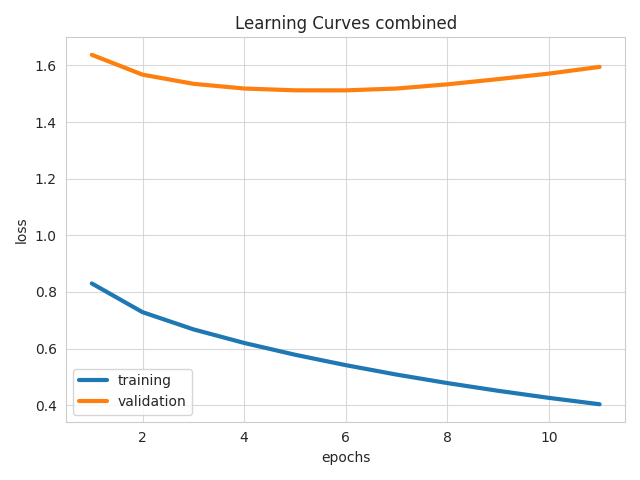

In [ ]:
im('learning_curves_combined_loss.png')

In [ ]:
#training with the model
predictions, stats = model.test(data_df = test_data)

Preprocessing 2210 datapoints
Predicting


DEBUG:ludwig.api:Predicting


Evaluation: 100%|██████████| 18/18 [00:01<00:00, 11.15it/s]
Postprocessing


DEBUG:ludwig.api:Postprocessing


In [ ]:
#combine predictions to compare with the test df
test_data['prediction'] = predictions['label_predictions']
test_data.head()
print("accuracy:" + str(
    sum(test_data['label'].apply(str) == test_data['prediction'])/len(test_data))
)

accuracy:0.3909502262443439


In [ ]:
stats

OrderedDict([('label',
              {'accuracy': 0.3330316742081448,
               'confusion_matrix': [[0, 0, 0, 0, 0, 0],
                [0, 136, 119, 101, 18, 15],
                [0, 115, 234, 99, 47, 15],
                [0, 216, 125, 241, 16, 35],
                [0, 63, 198, 37, 85, 16],
                [0, 64, 52, 115, 8, 40]],
               'hits_at_k': 0.8031674208144797,
               'loss': 1.788509645073662,
               'overall_stats': {'avg_f1_score_macro': 0.3089131231049746,
                'avg_f1_score_micro': 0.3330316742081448,
                'avg_f1_score_weighted': 0.32736317016469263,
                'avg_precision_macro': 0.3551754308686015,
                'avg_precision_micro': 0.3330316742081448,
                'avg_precision_weighted': 0.3330316742081448,
                'avg_recall_macro': 0.3091132761283543,
                'avg_recall_micro': 0.3330316742081448,
                'avg_recall_weighted': 0.3330316742081448,
                'kappa_

In [ ]:
#BERT-tiny encoder
model_definition = {
    'input_features': [
        {'name': 'text', 
         'type': 'text', 
         'level': 'word', 
         'encoder': 'bert',
         'config_path': '/content/bert_config.json',
         'checkpoint_path': '/content/bert_model.ckpt.index',
         'do_lower_case': True,
         'preprocessing': {'tokenizer': 'bert',
                           'vocab_file': '/content/vocab.txt',
                           'padding_symbol': '[PAD]',
                           'unknown_symbol': '[UNK]'}
         },
    ],
    'output_features': [
        {'name': 'label', 'type': 'category'}
    ],
    'training': {
        'learning_rate': 0.001, 
        'early_stop': 100,
    }
}
model_definition


{'input_features': [{'checkpoint_path': '/content/bert_model.ckpt.index',
   'config_path': '/content/bert_config.json',
   'do_lower_case': True,
   'encoder': 'bert',
   'level': 'word',
   'name': 'text',
   'preprocessing': {'padding_symbol': '[PAD]',
    'tokenizer': 'bert',
    'unknown_symbol': '[UNK]',
    'vocab_file': '/content/vocab.txt'},
   'type': 'text'}],
 'output_features': [{'name': 'label', 'type': 'category'}],
 'training': {'early_stop': 100, 'learning_rate': 0.001}}

In [ ]:
#bert-tiny encoder
print("creating model...")
model = LudwigModel(model_definition, logging_level = logging.DEBUG)

print("training model...")
model.train(data_train_df=train_data, data_validation_df=validation_data, data_test_df=test_data)

creating model...
training model...
Experiment name: api_experiment
Model name: run
Output path: results/api_experiment_run_2


ludwig_version: '0.2.2.8'
command: ('/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py -f '
 '/root/.local/share/jupyter/runtime/kernel-cb32a8b0-aff2-494a-b1bb-a9fa06694231.json')
random_seed: 42
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'checkpoint_path': '/content/bert_model.ckpt.index',
                              'config_path': '/content/bert_config.json',
                              'do_lower_case': True,
                              'encoder': 'bert',
                              'level': 'word',
                              'name': 'text',
                              'preprocessing': {   'padding_symbol': '[PAD]',
                                                   'tokenizer': 'bert',
                                                   'unknown_symbol': '[UNK]',
                               

In [ ]:
!pip install ludwig[text]


  Using cached https://files.pythonhosted.org/packages/02/36/9a02e27f0ec248b676a380ffe910c1858e3af3027c0d4d513dd0b56a5613/tensorflow-1.15.3-cp36-cp36m-manylinux2010_x86_64.whl
     |████████████████████████████████| 10.0MB 3.3MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 2.1MB 60.3MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
